In [1]:
from model.source_identify_model import SourceIdentifyModel

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from copy import deepcopy

%matplotlib inline

In [6]:
dataset_name = 'reddit-0.7K'
kernel_scale = 600
base_constant = 1.
model_path = "../data/output/TrainOnFullData/{}/model_kernel-scale={}_base-constant={}.pkl".format(
    dataset_name, kernel_scale, base_constant)
data_path = '../data/working/%s/DATA.pkl' % (dataset_name)

model = SourceIdentifyModel.load(model_path)
data = joblib.load(data_path)

In [2]:
def plot_heatmap(A, B=None, labels=None, title="", table_like=False, color_bar=False, ax=None):
    """Draw heatmap along with dots diagram for visualizing a weight matrix."""

    if ax is None:
        ax = plt.gca()

    # square shaped
    ax.set_aspect('equal', 'box')

    # turn off the frame
    ax.set_frame_on(False)

    # want a more natural, table-like display
    if table_like:
        ax.invert_yaxis()
        ax.xaxis.tick_top()

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(A.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(A.shape[1]) + 0.5, minor=False)

    # turn off all ticks
    ax.xaxis.set_tick_params(top=False, bottom=False)
    ax.yaxis.set_tick_params(left=False, right=False)

    # add labels
    if labels is not None:
        ax.set_xticklabels(labels, rotation=90)
        ax.set_yticklabels(labels)

    ax.set_title(title)

    # draw heatmap
    A_normed = (A - A.min()) / (A.max() - A.min())
    heatmap = ax.pcolor(A_normed, cmap=plt.cm.Greys)

    # add dots
    if B is not None:
        assert B.shape == A.shape
        for (y, x), w in np.ndenumerate(B):
            r = 0.35 * np.sqrt(w / B.max())
            circle = plt.Circle((x + 0.5, y + 0.5), radius=r, color='darkgreen')
            ax.add_artist(circle)

    # add colorbar
    if color_bar:
        ax.get_figure().colorbar(heatmap, ticks=[0, 1], orientation='vertical')

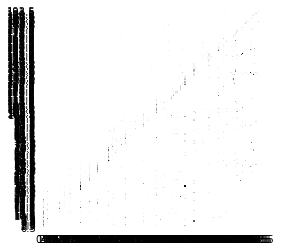

In [5]:
plot_heatmap(model.influential_matrix)

In [7]:
events = data['events']
rp = model.eval_rooted_proba(events)

df = data['dataframe']
len(events) == len(df)

df['root_proba'] = [rp[i] for i in range(rp.shape[0])]

1018it [02:11, 19.60it/s]


In [8]:
output = deepcopy(data)
df['root_proba'] = [rp[i] for i in range(rp.shape[0])]
output['dataframe'] = df
output['influential_matrix'] = model.influential_matrix

In [10]:
joblib.dump(output, '{}_kernel-scale={}_base-constant={}.pkl'.format(
    dataset_name, kernel_scale, base_constant))

['reddit-1K_kernel-scale=600_base-constant=0.1.pkl']

In [9]:
output.keys()

['vocabulary',
 'influential_matrix',
 'dimen_code',
 'dataframe',
 'start_date',
 'events']

In [59]:
df

date_time              source  \
0    2016-11-08 22:38:21      bwaredapenguin   
1    2016-11-08 22:38:32   LadyEeaterOfBacon   
2    2016-11-08 22:39:01            alfred-o   
3    2016-11-08 22:39:14        smokedspirit   
4    2016-11-08 22:39:19     thesilvertongue   
5    2016-11-08 22:39:28             ECrispy   
6    2016-11-08 22:39:35    Raidernationprez   
7    2016-11-08 22:40:18         Hatewrecked   
8    2016-11-08 22:40:19    ShooterMcGavin44   
10   2016-11-08 22:40:27             mcatech   
11   2016-11-08 22:40:39            Shizaruu   
12   2016-11-08 22:40:46         thatoneguys   
13   2016-11-08 22:40:49          xPhilly215   
14   2016-11-08 22:40:50              Risley   
15   2016-11-08 22:40:52          philphan25   
16   2016-11-08 22:41:01           Blaylocke   
17   2016-11-08 22:41:26          KillJoy575   
18   2016-11-08 22:41:41               cl33t   
19   2016-11-08 22:41:43   C-in-parentheses-   
20   2016-11-08 22:41:48            pb2crazy   
21   2016-11-08 22:41:51           PC_Viking   
574  2016-11-08 22:41:52             Mcfooce   
22   2016-11-08 22:41:55    pm_me_POTUS_pics   
23   2016-11-08 22:41:58     cucklordsupreme   
24   2016-11-08 22:42:03              merr14   
25   2016-11-08 22:42:09            rattrayc   
26   2016-11-08 22:42:11     system_exposure   
580  2016-11-08 22:42:12      Speak_and_tell   
27   2016-11-08 22:42:18             mcatech   
28   2016-11-08 22:42:20        smokedspirit   
...                  ...                 ...   
939  2016-11-09 01:27:27    swan_faced_bitch   
558  2016-11-09 01:34:02          jrr6415sun   
559  2016-11-09 01:35:26           TomPuck15   
940  2016-11-09 01:36:19           up_coats1   
857  2016-11-09 01:37:39          jrr6415sun   
855  2016-11-09 01:39:17          jrr6415sun   
560  2016-11-09 01:40:09           SeahawkTJ   
941  2016-11-09 01:43:34           up_coats1   
561  2016-11-09 01:45:12  ZoidbergNickMedGrp   
562  2016-11-09 01:50:17     Kemosabenohobby   
976  2016-11-09 01:54:46        JurijFedorov   
563  2016-11-09 01:56:54             abbyoyo   
978  2016-11-09 02:00:01    swan_faced_bitch   
995  2016-11-09 02:03:50           up_coats1   
564  2016-11-09 02:04:49  ZoidbergNickMedGrp   
565  2016-11-09 02:05:19     Kemosabenohobby   
566  2016-11-09 02:08:02          Mc6arnagle   
859  2016-11-09 02:11:12           up_coats1   
858  2016-11-09 02:14:57           up_coats1   
1006 2016-11-09 02:29:24    swan_faced_bitch   
1012 2016-11-09 02:30:15           up_coats1   
567  2016-11-09 02:34:03           SeahawkTJ   
568  2016-11-09 02:34:51  ZoidbergNickMedGrp   
899  2016-11-09 02:47:36           Crabfight   
569  2016-11-09 02:55:45            Shizaruu   
860  2016-11-09 03:00:37           hrgoodman   
570  2016-11-09 03:04:07           hrgoodman   
961  2016-11-09 07:48:41            Wild2098   
986  2016-11-09 08:04:59           Crabfight   
906  2016-11-09 17:28:24             LX_Theo   

                                              text_mark          root_cause  \
0     This is atrocious. I have never been more asha...      bwaredapenguin   
1               Which live source is the best to watch?   LadyEeaterOfBacon   
2          If Michigan goes trump it's all over right?             alfred-o   
3                              virginia goes to clinton        smokedspirit   
4     At least the late night comedians will have mo...     thesilvertongue   
5     Is there ANY chance she wins now???\r\n\r\nI h...             ECrispy   
6     http://www.nytimes.com/elections/forecast/pres...    Raidernationprez   
7     Make no mistake: The DNC will move right if Tr...         Hatewrecked   
8     So the people working for the DNC career's are...    ShooterMcGavin44   
10                Wow....Asian markets are FREE FALLING             mcatech   
11    I am living in Seoul, just woke up. Is Trump s...            Shizaruu   
12    NYT projects Trump with a 91% chance of winnin...         thatoneguys   
13         

In [10]:
import sys
import os.path as osp
sys.path.append("../lib")
from model.source_identify_model import SourceIdentifyModel

import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from copy import deepcopy

%matplotlib inline

dataset_name = 'reddit-0.7K'
kernel_scale = 600
base_constant = 1.
res_path = "../data/output/TrainOnFullData/{}/summary_kernel-scale={}_base-constant={}.pkl".format(
    dataset_name, kernel_scale, base_constant)
model_path = res_path.replace("summary", "model")
results = joblib.load(res_path)
model = SourceIdentifyModel.load(model_path)

In [2]:
A = results['influential_matrix']

In [12]:
model.base_intensity_weights

array([  2.78940028e-04,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,   1.00000000e-06,   1.00000000e-06,
         1.00000000e-06,

In [5]:
result

NameError: name 'model' is not defined